In [9]:
import requests
import pickle
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Philip Fowler
https://github.com/drpafowler/web-scraping-philip 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)
html_content = response.text

# Dump the HTML content to a .pkl file
with open('article_html.pkl', 'wb') as file:
    pickle.dump(html_content, file)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Print the text content of the article
print(soup.get_text())


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common tokens
token_freq = Counter(tokens).most_common(5)

# Print the common tokens with their frequencies
print("Most common tokens and their frequencies:")
for token, freq in token_freq:
    print(f"Token: {token}, Frequency: {freq}")

Most common tokens and their frequencies:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


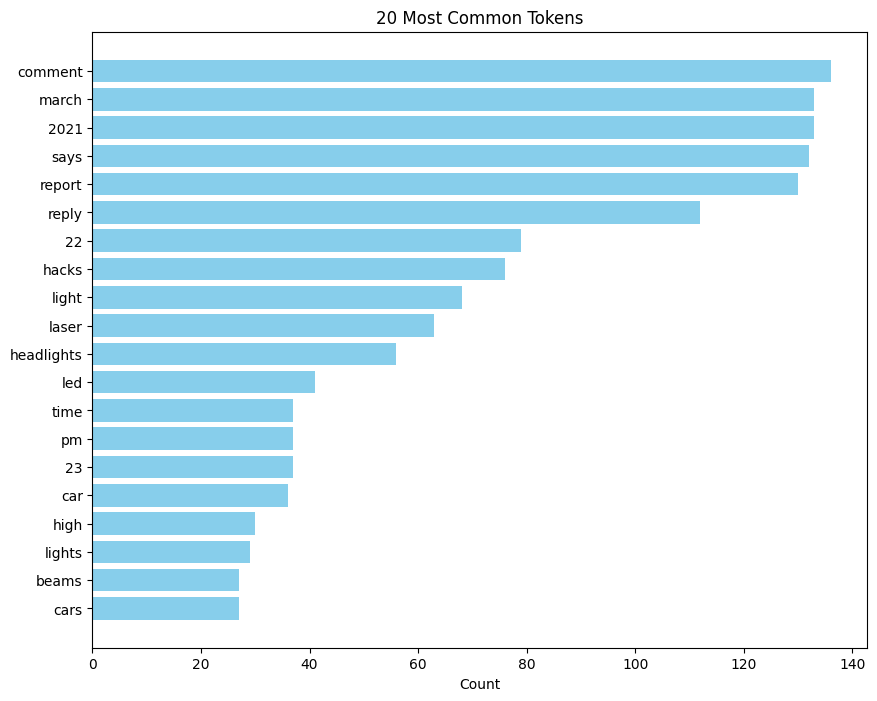

In [30]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 20 most common tokens
token_freq = Counter(tokens).most_common(20)

# Separate the tokens and their frequencies
tokens, frequencies = zip(*token_freq)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(tokens, frequencies, color='skyblue')
plt.xlabel('Count')
plt.title('20 Most Common Tokens')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
# Filter tokens: remove punctuation, stopwords, and whitespace, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common lemmas
lemma_freq = Counter(lemmas).most_common(5)

# Print the common lemmas with their frequencies
print("Most common lemmas and their frequencies:")
for lemma, freq in lemma_freq:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most common lemmas and their frequencies:
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


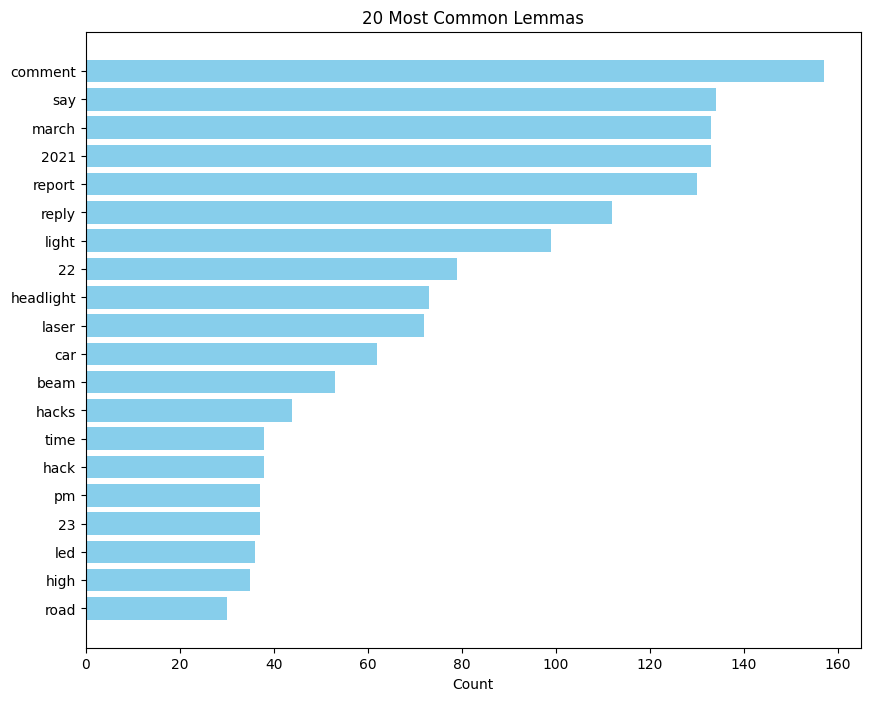

In [29]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 20 most common lemmas
lemma_freq = Counter(lemmas).most_common(20)

# Separate the lemmas and their frequencies
lemmas, frequencies = zip(*lemma_freq)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(lemmas, frequencies, color='skyblue')
plt.xlabel('Count')
plt.title('20 Most Common Lemmas')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [7]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    tokens = [token.text.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    
    # Calculate the score
    score = interesting_count / len(tokens) if tokens else 0
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence and get lemmas
    lemmas = [token.lemma_.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Calculate the score
    score = interesting_count / len(lemmas) if lemmas else 0
    return score

# Test the functions with the first sentence in the article
first_sentence = list(doc.sents)[0].text
interesting_tokens = [token for token, _ in token_freq]
interesting_lemmas = [lemma for lemma, _ in lemma_freq]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print(f"Token score for the first sentence: {token_score}")
print(f"Lemma score for the first sentence: {lemma_score}")

Token score for the first sentence: 0.12195121951219512
Lemma score for the first sentence: 0.14634146341463414


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

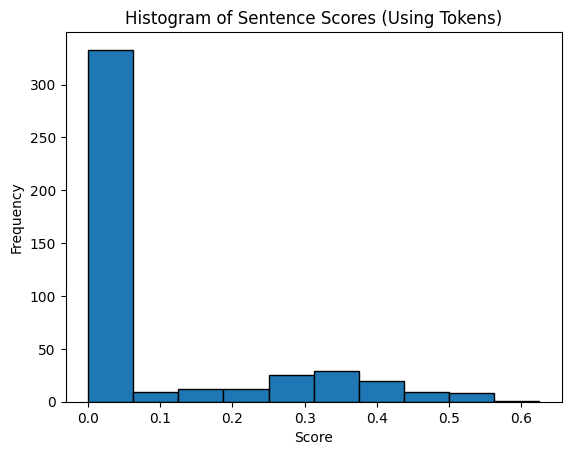

In [ ]:
# Get the scores of every sentence in the article using tokens
sentence_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot a histogram of the scores
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Tokens)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# From the histogram, the most common range of scores seems to be between 0.0 and 0.1

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

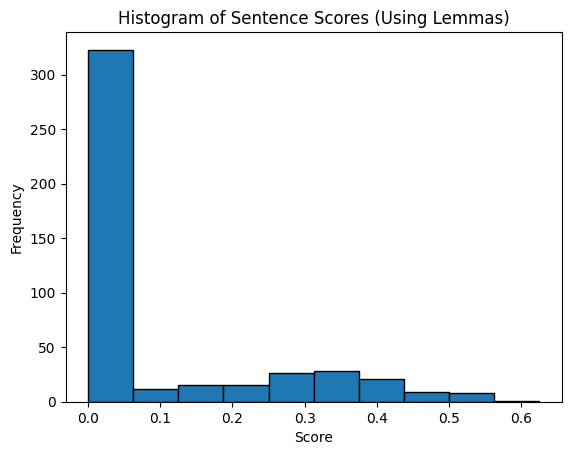

In [11]:
# Get the scores of every sentence in the article using lemmas
sentence_scores_lemmas = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# Plot a histogram of the scores
plt.hist(sentence_scores_lemmas, bins=10, edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Lemmas)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# From the histogram, the most common range of scores seems to be between 0.0 and 0.1

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it). 

per spacy documentation https://spacy.io/usage/linguistic-features, spacy can identify parts of speech.  

In [13]:
# Filter tokens: remove punctuation, stopwords, whitespace, and only keep nouns
tokens = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common tokens
token_freq = Counter(tokens).most_common(5)

# Print the common tokens with their frequencies
print("Most common noun tokens and their frequencies:")
for token, freq in token_freq:
    print(f"Token: {token}, Frequency: {freq}")

# Filter tokens: remove punctuation, stopwords, whitespace, and only keep nouns, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common lemmas
lemma_freq = Counter(lemmas).most_common(5)

# Print the common lemmas with their frequencies
print("Most common noun lemmas and their frequencies:")
for lemma, freq in lemma_freq:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most common noun tokens and their frequencies:
Token: comment, Frequency: 135
Token: report, Frequency: 105
Token: laser, Frequency: 51
Token: headlights, Frequency: 49
Token: light, Frequency: 42
Most common noun lemmas and their frequencies:
Lemma: comment, Frequency: 156
Lemma: report, Frequency: 105
Lemma: light, Frequency: 71
Lemma: headlight, Frequency: 69
Lemma: car, Frequency: 62


# Time to experiment

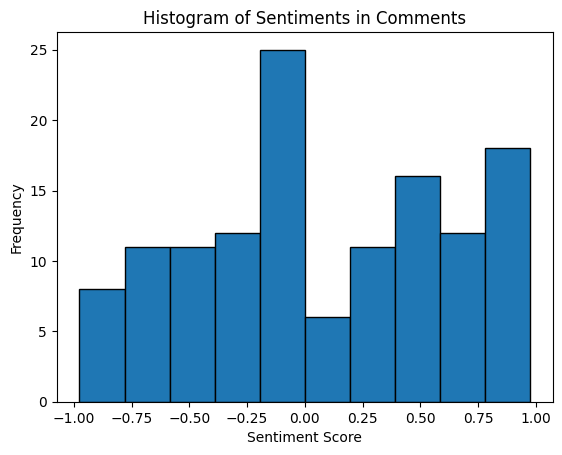

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Extract the main text of each thought
def extract_thoughts(soup):
    # Extract all the comments from the article
    comments = soup.find_all('div', class_='comment-content')
    
    # Extract the main text of each thought
    thoughts = [comment.get_text(strip=True) for comment in comments]
    
    return thoughts

thoughts = extract_thoughts(soup)

# Create a list of sentiments
sentiments = [analyzer.polarity_scores(thought)['compound'] for thought in thoughts]

# Plot a single histogram of the sentiments
plt.hist(sentiments, bins=10, edgecolor='black')
plt.title('Histogram of Sentiments in Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [25]:
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Print the list of stopwords
print(STOP_WORDS)

{'she', 'none', 'twenty', 'toward', 'indeed', 'has', 'therefore', 'nothing', 'down', 'cannot', 'put', 'afterwards', 'now', 'any', 'nor', 'ten', 'seems', 'whither', 'anyone', 'become', 'amount', 'either', 'again', '’re', 'became', 'call', 'say', 'about', "'ll", 'can', 'while', '’ll', 'this', 'nine', 'him', 'however', 'where', 'whose', 'beforehand', 'those', 'once', 'ourselves', 'at', 'whence', 'anywhere', 'yourselves', 'within', 'name', 'thereby', 'just', 'often', 'per', 'although', 'alone', 'up', 'an', 'out', 'other', 'neither', 'keep', 'such', 'off', '‘s', 'whom', 'due', 'give', 'from', 'used', 'five', 'so', 'of', 'should', 'thereafter', 'thru', 'could', "'d", 'eleven', 'go', "n't", 'itself', 'already', 'ours', 'get', "'s", 'every', 'to', 'would', 'move', 'much', 'too', 'full', 'someone', 'front', "'re", '’d', 'that', 'something', 'then', 'did', 'because', 'as', 'during', 'its', 'four', 'must', 'elsewhere', 'anyhow', 'forty', 'have', 'by', 'very', 'will', 'may', 'or', 'three', 'whenev

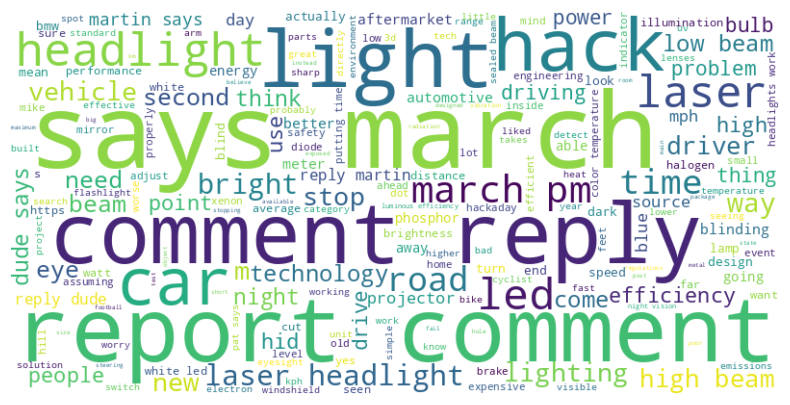

In [28]:
from wordcloud import WordCloud

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(soup.get_text())

# Filter tokens: remove punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Join tokens to form a single string
text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()